## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej ($y$) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#YOUR CODE HERE

df = pd.read_csv('../datasets/Salary.csv', sep=',')

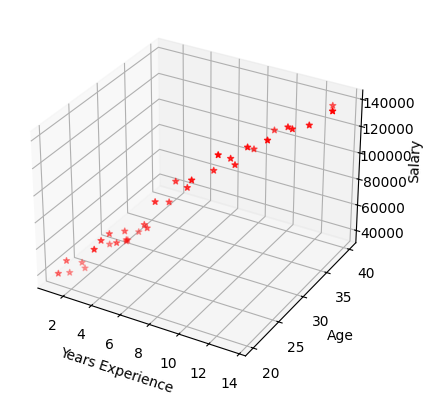

In [2]:
# Dane
years_experience = df['YearsExperience']  # Przykładowe dane dotyczące lat doświadczenia
age = df['Age']  # Przykładowe dane dotyczące wieku
salary = df['Salary']  # Przykładowe dane dotyczące wynagrodzenia

# Wykres 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Tworzenie wykresu
ax.scatter(years_experience, age, salary, c='r', marker='*')

# Etykiety osi
ax.set_xlabel('Years Experience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

plt.show()


## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [3]:
import random
from typing import Tuple, List

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    #YOUR CODE HERE
    return (random.random() if alpha == None else alpha,np.array([random.random() for x in range(n + 1)]))

def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    #YOUR CODE HERE
    return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])

def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    #YOUR CODE HERE
    if np.array(calculate_regression_function(X,betas)).shape != np.array(y).shape:
        print(f'calculate_error ALERT calculate_regression_function: {np.array(calculate_regression_function(X,betas)).shape} != y: {np.array(y).shape} ')
    return np.sum((calculate_regression_function(X,betas) - y)**2)/len(y)

def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    #YOUR CODE HERE
    return np.append(np.array(np.sum(calculate_regression_function(X,betas) - y)/len(y)), 
                     np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    #YOUR CODE HERE
    if np.array(calculate_regression_function(X,betas)).shape != np.array(y).shape:
        print(f'calculate_error ALERT betas: {np.array(betas).shape} != calculate_gradient: {np.array(calculate_gradient(X,y,betas)).shape} ')
    return np.array(betas-calculate_gradient(X,y,betas)*alpha)

TEST

In [4]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(X: np.ndarray, y: np.ndarray, epochs: int = 1000, alpha: float = 0.00005) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    #YOUR CODE HERE
    betas = [[]]
    _, betas[0] = initialize_coefficients(len(np.array(X)[0]), alpha=0.00005)
    error = []
    for i in range (epochs):
        error.append(calculate_error(X,y,np.array(betas[-1])))
        betas.append(update_regression_coefficients(X,y,np.array(betas[-1]),alpha))
    return ([beta[0] for beta in betas], [beta[1:] for beta in betas], error)


### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

In [5]:
#YOUR CODE HERE
beta0, betas, error = learn_and_fit(np.array(df[['YearsExperience','Age']]),np.array(df['Salary']),epochs=2000)

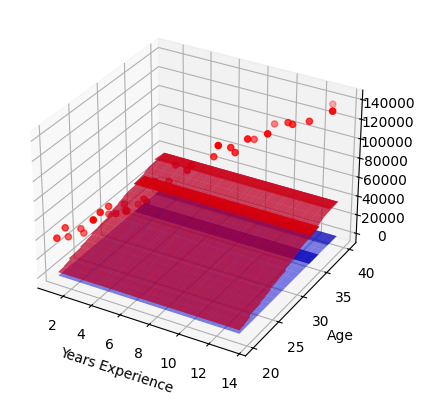

In [6]:
#YOUR CODE HERE

# Dane
from matplotlib import cm

# Wykres 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Tworzenie wykresu
ax.scatter(years_experience, age, salary, c='r', marker='o')
X, Y = np.meshgrid(years_experience, age)
Z = [calculate_regression_function(np.array([[year,ages] for ages in age]),beta0[0] + betas[0]) for year in years_experience]
ax.plot_surface(X, Y, np.array(Z), color='blue', alpha=0.5)
Z = [calculate_regression_function(np.array([[year,ages] for ages in age]),beta0[1000] + betas[1000]) for year in years_experience]
ax.plot_surface(X, Y, np.array(Z), color='purple', alpha=0.5)
Z = [calculate_regression_function(np.array([[year,ages] for ages in age]),beta0[-1] + betas[-1]) for year in years_experience]
ax.plot_surface(X, Y, np.array(Z), color='red', alpha=0.5)
# Etykiety osi
ax.set_xlabel('Years Experience')
ax.set_ylabel('Age')

# ax.show()
plt.show()

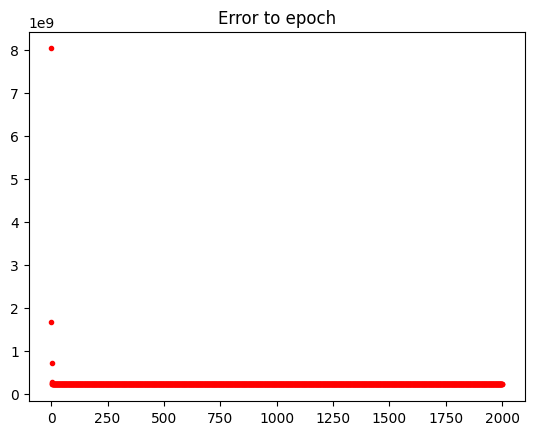

In [8]:
plt.scatter(range(2000),error, marker='.', c='r')
plt.title('Error to epoch')
plt.show()

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [9]:
#YOUR CODE HERE
df = pd.read_csv('../datasets/multi_variable_regression.csv', sep=',')

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

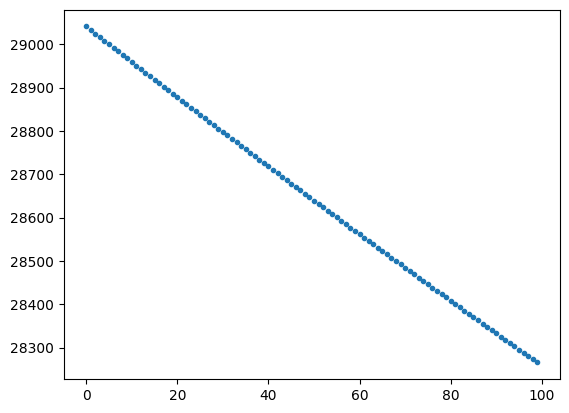

In [10]:
#YOUR CODE HERE
beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100)
plt.scatter(range(100),error, marker='.')
plt.show()

### Zadanie 6

W jaki sposób współczynnik alpha wpływa na działania algorytmu? Przeprowadź eksperyment dla minimum trzech różnych wartości tego parametru. Sformułuj wnioski. Jak zmiana parametru wpłynęła na ilość epok w algorytmie? Jak zmieniła się funkcja regresji?

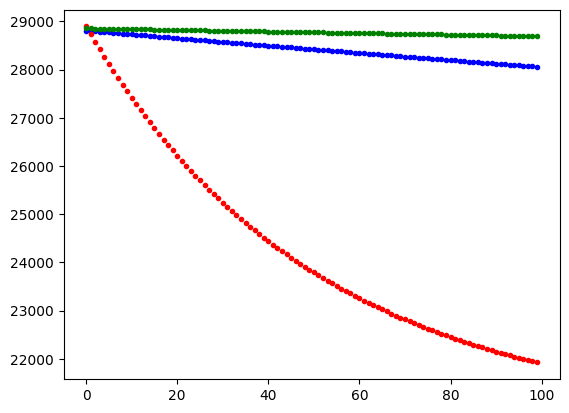

In [11]:
# YOUR CODE HERE

beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100,alpha=0.00005)
plt.scatter(range(100),error, marker='.',c='b')

beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100,alpha=0.001)
plt.scatter(range(100),error, marker='.', c='r')

beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100,alpha=0.00001)
plt.scatter(range(100),error, marker='.', c='g')
plt.show()

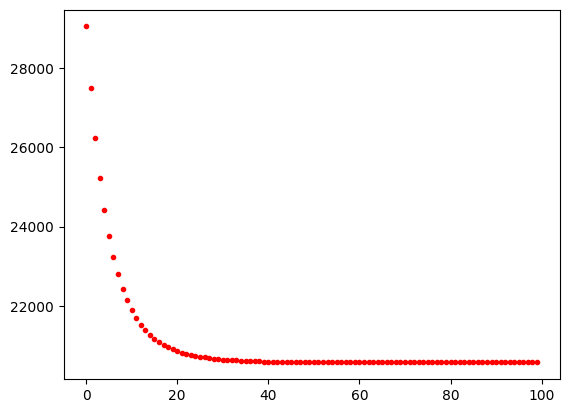

In [12]:
beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100,alpha=0.01)
plt.scatter(range(100),error, marker='.', c='r')

### Zadanie 7

Porównaj czas działania algorytmu we własnej implementacji oraz implementacji z biblioteki Sklearn.

In [13]:
import time
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE
begin_time = time.time()
beta0, betas, error = learn_and_fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']),epochs=100,alpha=0.01)
end_time = time.time()

print(end_time - begin_time)

begin_time = time.time()
model = LinearRegression()
model.fit(np.array(df[['x1','x2','x3','x5','x6']]),np.array(df['y']))
end_time = time.time()

print(end_time - begin_time)



31.92414140701294
0.006997585296630859
